In [1]:
#loading the dataset
import pandas as pd
df = pd.read_csv("default of credit card clients.csv")
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [3]:
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [4]:
#checking null value in the dataset
df.isnull().sum()


Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

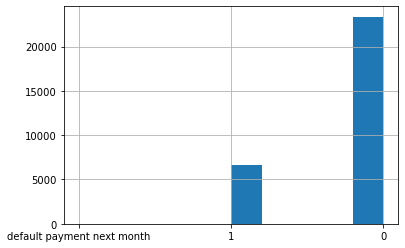

In [5]:
_=df['Y'].hist()

In [13]:
df['Y'].value_counts()

0                             23364
1                              6636
default payment next month        1
Name: Y, dtype: int64

In [7]:
# finding the imbalanced % in dataset
df[df['Y']==1]['Y'].count()/df['Y'].count()

0.0

In [15]:
df_class_0 = df[df['Y'] == '0']
df_class_1 = df[df['Y'] == '1']

In [16]:
print(len(df_class_0),len(df_class_1))

23364 6636


In [37]:
#65% imbalance
df_class_0_low_imb = df_class_0.sample(int(len(df_class_1)/35)*65)
#75% imbalance
df_class_0_med_imb = df_class_0.sample(int(len(df_class_1)/25)*75)
#90% imbalance
new_df_class_1_len = int(len(df_class_0)/90)*10
df_class_1_high_new = df_class_1.sample(new_df_class_1_len)
df_class_0_high_imb = df_class_0.sample(int(new_df_class_1_len/10)*90)

In [23]:
print(len(df_class_0_low_imb),len(df_class_1))

12285 6636


In [27]:
print((len(df_class_0_low_imb)/(len(df_class_0_low_imb)+len(df_class_1)))*100)
print((len(df_class_1)/(len(df_class_0_low_imb)+len(df_class_1)))*100)

64.92785793562707
35.07214206437292


In [39]:
df_low_imbalanced = pd.concat([df_class_0_low_imb, df_class_1], axis=0)
df_med_imbalanced = pd.concat([df_class_0_med_imb, df_class_1], axis=0)
df_high_imbalanced = pd.concat([df_class_0_high_imb, df_class_1_high_new], axis=0)

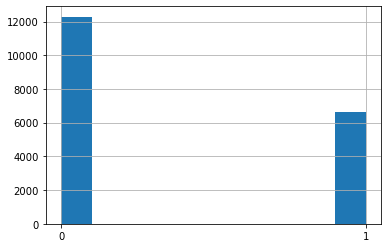

In [42]:
_=df_low_imbalanced['Y'].hist()

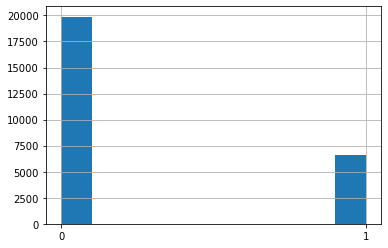

In [43]:
_=df_med_imbalanced['Y'].hist()

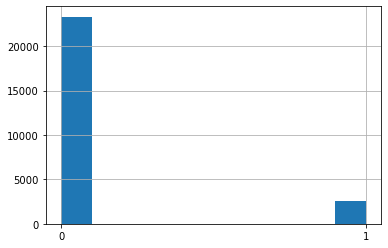

In [44]:
_=df_high_imbalanced['Y'].hist()

In [29]:
df_low_imbalanced

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
2213,2213,10000,1,2,2,21,0,0,0,0,...,8880,9580,9000,1217,1000,200,700,200,0,0
16461,16461,100000,2,1,1,51,0,0,0,0,...,91143,77655,78518,3200,3400,3700,2800,2900,3100,0
27646,27646,100000,2,2,1,24,-1,-1,0,-1,...,23472,12500,14666,7500,10035,23500,12500,14666,79053,0
11715,11715,180000,2,1,2,32,1,2,2,0,...,5168,0,0,1000,0,103,0,0,0,0
26879,26879,200000,1,4,1,49,0,0,0,0,...,50146,50235,48984,1689,2164,2500,3480,2500,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29995,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
